Subject2:

**titanic号の生存/非生存データを使ってロジスティック回帰モデルを実装する**。

In [ ]:
import  numpy   as  np
import  pandas  as  pd
import  seaborn as  sns
import matplotlib.pyplot as plt
from  sklearn.linear_model  import  LogisticRegression
from    sklearn.model_selection import  train_test_split

In [ ]:
titanic_data = sns.load_dataset("titanic")
titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Suvived  ->  乗客の生存状態

pclass   ->  客室の階級

sex      ->  性別

age      ->　年齢

slibsp   ->  同乗している兄弟,配偶者の数

parch    ->　同乗してる親,子供

fare     ->  料金

embarked ->  乗船した港

class    ->  客室の階級

who      ->　性別

adult_male-> 大人か子供か

deck     ->当時居た場所

embark_town -> 乗船した港

alive    -> 生存の安否

alone    ->一人で乗船したか否か

In [ ]:
drop_df = ["sibsp","parch","fare","embarked","class","who","adult_male","deck","embark_town","alive","alone"]
#town_dummies = pd.get_dummies(titanic_data["embark_town"])
#titanic_data["deck"] = titanic_data["deck"].fillna(titanic_data["deck"].mode()[0])
#deck = titanic_data["deck"]
titanic_data = titanic_data.drop(columns = drop_df, axis = 1)
titanic_data

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0


In [ ]:
titanic_data.isnull().sum()

survived      0
pclass        0
sex           0
age         177
dtype: int64

In [ ]:
titanic_data["age"] = titanic_data["age"].fillna(titanic_data["age"].mean())
titanic_data["sex"] = titanic_data["sex"].map({"male":1, "female":0})
titanic_data

,survived,pclass,sex,age
0,0,3,1,22.000000
1,1,1,0,38.000000
2,1,3,0,26.000000
3,1,1,0,35.000000
4,0,3,1,35.000000
...,...,...,...,...
886,0,2,1,27.000000
887,1,1,0,19.000000
888,0,3,0,29.699118
889,1,1,1,26.000000


In [ ]:
town_dummies

,Cherbourg,Queenstown,Southampton
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [ ]:
deck.value_counts()

C    747
B     47
D     33
E     32
A     15
F     13
G      4
Name: deck, dtype: int64

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

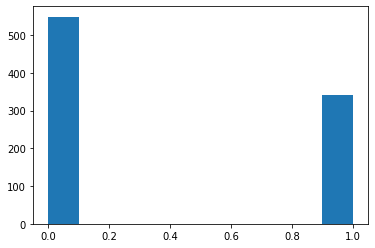

In [ ]:
plt.hist(titanic_data['survived'])

In [ ]:
X = titanic_data.drop("survived", axis = 1)
Y = titanic_data["survived"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, stratify=Y,random_state = 0)

In [ ]:
logreg = LogisticRegression(penalty="none")
logreg.fit(X_train, Y_train)

LogisticRegression(penalty='none')

In [ ]:
print(f"回帰係数:{logreg.coef_}")
print(f"定数項:{logreg.intercept_}")
print(f"訓練スコア:{logreg.score(X_train, Y_train)}")
print(f"テストスコア:{logreg.score(X_test, Y_test)}")

回帰係数:[[-1.18615539 -2.5911278  -0.03517198]]
定数項:[4.78229435]
訓練スコア:0.7881219903691814
テストスコア:0.8246268656716418
